<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/Parciales2021_2/P2SyS2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 2 SyS - 2021-2

1. Determine y grafique (magnitud) el espectro en frecuencia de la señal $x(t) = -|\sin^2(100\pi t)|$ para $t\in[-\tfrac{1}{100},\tfrac{1}{100}]$ y los armónicos $n=\{0,\pm1,\pm2,\pm3,\pm4,\pm5\}.$ Nota: recuerde que $\sin^2(\theta) = 0.5-0.5\cos(2\theta)$. (Valor: 2.5 puntos).


La señal $x(t)$ se puede reescribir como:

$$x(t)=-|\sin^2(100\pi t)| = -|\sin^2(2\pi 50 t)| =-\left|\frac{1}{2}-\frac{1}{2}\cos(2\pi 100 t)\right| = -\left(\frac{1}{2}-\frac{1}{2}\cos(2\pi 100 t)\right)$$

Nota: En este caso el operador valor absoluto no influye en el signo de la señal al abrir el cuadrado de la expresión original, según se aprecia en la siguiente gráfica:

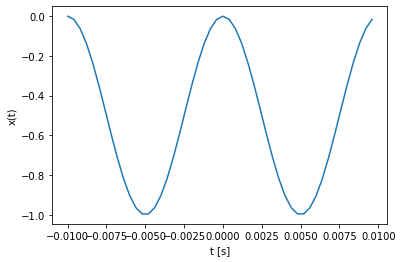

In [22]:
#simular señal de entrada
import numpy as np
import matplotlib.pyplot as plt

Fo = 50 #frecuencia orignal
To = 1/Fo #periodo señal
Fs = 50*Fo #frecuencia muestreo para simulación
t = np.arange(-To/2,To/2,1/Fs) #vector de tiempo
x = -abs(np.sin(2*np.pi*Fo*t)**2)
plt.plot(t,x)
plt.xlabel('t [s]')
plt.ylabel('x(t)')
plt.show()


Dado que la señal presenta simetría par, se calculará la serie trigonométrica para simplificar los análisis:

$$a_n = \frac{4}{T_o}\int_0^{To/2}x(t)\cos(n\omega_o t)dt$$

para $n > 0,$ y $b_n = 0$ por simetría par en $x(t)$.


Además, teniendo en cuenta que la señal se compone de un nivel DC y una componente cosenoidal (parte de las bases ortogonales de Fourier), se puede deducir que:

$$x(t) = -\frac{1}{2}+\frac{1}{2}\cos(2 \cdot 2 \pi F_o t) =a_o+ \sum_{n=1}^N a_n\cos(n\omega_o t) = a_o+ \sum_{n=1}^N a_n\cos(n 2\pi F_o t)=a_o+ a_2\cos(2\cdot2\pi F_o t)$$

con $\omega_o = 2\pi F_o.$ En este caso, $F_o=50$ Hz.

Igualando las expresiones, tenemos que:

$$a_o = -\frac{1}{2}$$

$$a_2 = \frac{1}{2}$$

$$ a_n = 0, \quad n \neq\{0,2\}$$

Por otra parte, teniendo en cuenta que:

$$c_o = a_o$$
$$c_n = \frac{a_n - j b_n}{2}, \quad  \forall n\neq 0$$

Entonces:

$$c_o = a_o = -\frac{1}{2}$$

$$c_2 = c_{-2} = \frac{a_2}{2} = \frac{1}{4}$$

$$ c_n = 0, \quad n \neq\{0,\pm 2\}$$

Note que $c_2 = c_{-2}$ dado que el componente cosenoidal es par. La expresión en serie exponencial de Fourier quedará entonces como:

$$x(t) = \sum_{n=-N}^N c_n e^{jn\omega_o t} = c_{-2}e^{-j2\omega_o t} + c_o + c_2 e^{j 2\omega_o t}=\frac{1}{4}e^{-j2\omega_o t} - \frac{1}{2} + \frac{1}{4} e^{j 2\omega_o t}$$

$$x(t)= - \frac{1}{2} + \frac{1}{2} \left(\frac{e^{j 2\omega_o t}+e^{-j 2\omega_o t}}{2}\right)=- \frac{1}{2} + \frac{1}{2}\cos(2\cdot 2\pi F_o t)$$




In [23]:
#simulación espectro serie de Fourier
#bases exponenciales
N = 5 #número armonicos
wo = 2*np.pi*Fo # frecuencia fundamental
# definir bases
phin = np.zeros((len(t),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*t)#base de fourier en el interva

In [24]:
#calcular espectro serie exponencial
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
Cn[N] = -1/2 # nivel dc c_0 
Cn[N-2] = 1/4 # c_n para n = -2
Cn[N+2] = 1/4 # c_n para n = 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of indi

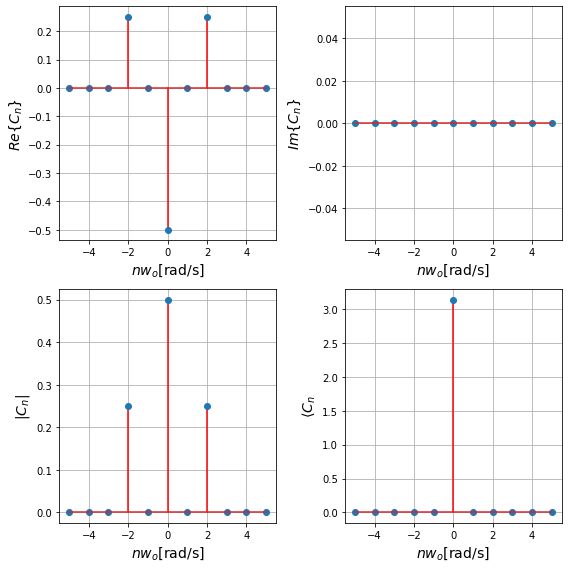

In [25]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [26]:
#Reconstrucción de la señal
from ipywidgets import interact
def pltest(Na=0):
    ind = range(N-Na,N+Na+1)
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(t,xe,color='b',label='$x_e(t)$',marker='.') # señal estimada o filtrada
    plt.plot(t,x,color='r',label='x') #señal original
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(0,N,1))

interactive(children=(IntSlider(value=0, description='Na', max=5), Output()), _dom_classes=('widget-interact',…

<function __main__.pltest>

2. Se tiene un sistema de modulación por amplitud, Amplitude Modulation - (AM), con portadora $c(t)=A_c \sin (2\pi F_c t)$ y señal mensaje $x(t)= A_m {\rm{rect}}_\tau(t).$ Encuentre el espectro en frecuencia de la señal modulada $y(t)=\left(1+\frac{m(t)}{A_c}\right)c(t)$ y la señal demodulada $d(t)=y(t)c(t)$. Utilizando la información del espectro en frecuencia, ¿cómo se podría recuperar $x(t)$ desde la señal $d(t)$?. Genere un bosquejo del proceso para recuperar $x(t)$. Nota: puede referenciar y utilizar las propiedades o tablas de Fourier que le sean útiles en el ejercicio. (Valor 2.5 puntos).



Para la señal mensaje se tiene que (ver [tablas de Fourier](https://github.com/amalvarezme/SenalesSistemas/blob/master/3_SerieyTransformadaFourier/Tablas_TransformadaFourier.pdf)):

$$M(\omega)=\mathcal{F}\{A_m{\rm{rect}}_\tau(t)\} =A_m\tau {\rm{sinc}}\left(\frac{\omega \tau}{2}\right)$$

Para la señal portadora (ver [tablas de Fourier](https://github.com/amalvarezme/SenalesSistemas/blob/master/3_SerieyTransformadaFourier/Tablas_TransformadaFourier.pdf)):

$$C(\omega)=\mathcal{F}\{A_c \sin(\omega_ct)\} =\frac{A_c\pi}{j}\left(\delta(\omega -\omega_c)-\delta(\omega +\omega_c)\right)$$

Ahora, para el caso de la señal modulada:

$$y(t)=\left(1+\frac{m(t)}{A_c}\right)c(t)=c(t)+\frac{1}{A_c}c(t)m(t)=A_c \sin(\omega_ct)+\frac{1}{A_c}\left(A_c \sin(\omega_ct)A_m{\rm{rect}}_\tau(t)\right)$$

$$y(t)=A_c \sin(\omega_ct)+ A_m\sin(\omega_ct){\rm{rect}}_\tau(t)$$

entonces:

$$Y(\omega)=\mathcal{F}\{A_c \sin(\omega_ct)\}+A_m\mathcal{F}\{\sin(\omega_ct){\rm{rect}}_\tau(t)\}$$

El primer termino de la expresión anterir corresponde al espectro de la portadora, mientras que el segundo termino se puede extender mediante eulers complejos:

$$\sin(\omega_ct){\rm{rect}}_\tau(t)=\frac{e^{j\omega_ct}-e^{-j\omega_ct}}{2j}{\rm{rect}}_\tau(t)=\frac{1}{2j}\left(e^{j\omega_ct}{\rm{rect}}_\tau(t)-e^{-j\omega_ct}{\rm{rect}}_\tau(t)\right)$$

Teniendo en cuenta que (ver [propiedades de Fourier](https://github.com/amalvarezme/SenalesSistemas/blob/master/3_SerieyTransformadaFourier/Propiedades_TransformadaFourier.pdf))

$$\mathcal{F}\{x(t)e^{\pm j\omega_o t}\}= X(\omega\mp \omega_o)$$

Luego:

$$\mathcal{F}\{\sin(\omega_ct){\rm{rect}}_\tau(t)\}=\frac{1}{2j}\left(\mathcal{F}\{e^{j\omega_ct}{\rm{rect}}_\tau(t)\}-\mathcal{F}\{e^{-j\omega_ct}{\rm{rect}}_\tau(t)\}\right)=\frac{1}{2j}\left({\tau\rm{sinc}}\left(\frac{\tau(\omega-\omega_c)}{2}\right)-{\tau\rm{sinc}}\left(\frac{\tau(\omega+\omega_c)}{2}\right)\right)$$

Por consiguiente:

$$Y(\omega)=\frac{A_c\pi}{j}\left(\delta(\omega -\omega_c)-\delta(\omega +\omega_c)\right)+\frac{\tau}{2j}\left({\rm{sinc}}\left(\frac{\tau(\omega-\omega_c)}{2}\right)-{\rm{sinc}}\left(\frac{\tau(\omega+\omega_c)}{2}\right)\right)$$

A continuación se presentan las simulaciones respectivas:



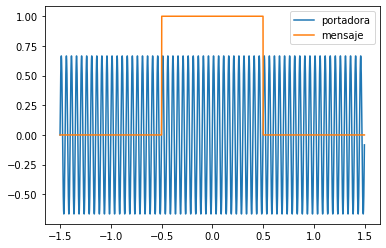

In [27]:
import numpy as np
import matplotlib.pyplot as plt
Fc = 20 #frecuencia de portadora
Am = 1 #amplitud del mensaje
tau = 1 #ancho del pulso en el mensaje
ti = -tau-tau*0.5 #intervalo a graficar
tf = tau + tau*0.5  
Fs = 50*Fc #frecuencia muestreo
t = np.arange(ti,tf,1/Fs) #vector del tiempo

#generar función rect
m = np.zeros(len(t))
m[(t>=-tau/2) & (t<=tau/2)] = Am

#índice de modulación para graficar
Im = 1.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(m)/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora

#graficar señales
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

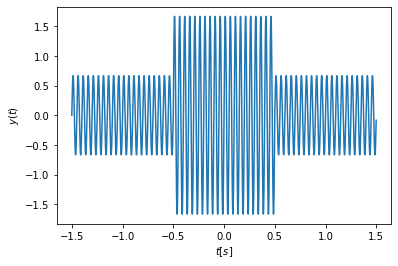

In [28]:
#se genera señal modulada
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

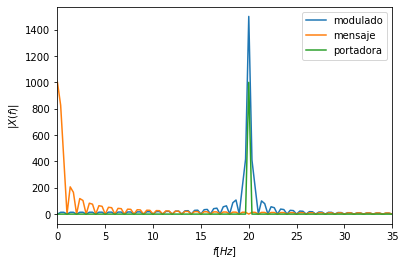

In [29]:
#espectros señal portadora, mensaje y modulada utilizando rfft
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(m)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs) #vector de frecuencias en Hz

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.xlim([0,1.75*Fc])
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.show()

Respecto a la señal demodoluda tenemos que:

$$d(t)=y(t)c(t)=\left(1+\frac{m(t)}{A_c}\right)c(t)c(t)=c^2(t)+\frac{1}{A_c}c^2(t)m(t)=A^2_c \sin^2(\omega_ct)+\frac{1}{A_c}\left(A^2_c \sin^2(\omega_ct)m(t)\right)$$

$$d(t)=\frac{A^2_c}{2}-\frac{A^2_c}{2}\cos(2\omega_c t) +\frac{A_c}{2}m(t)-\frac{A_c}{2}\cos(2\omega_c t)m(t)$$

Reorganizando tenemos:

$$d(t)=\frac{A_c}{2}m(t)+\frac{A^2_c}{2}-\frac{A^2_c}{2}\cos(2\omega_c t) -\frac{A_c}{2}\cos(2\omega_c t)m(t)$$

Y su respectivo espectro se determina como:

$$D(\omega)=\frac{A_c}{2}\mathcal{F}\left\{m(t)\right\}+\frac{A^2_c}{2}\mathcal{F}\left\{1\right\}-\frac{A_c^2}{2}\mathcal{F}\{\cos(2\omega_ct)\}-\frac{A_c}{2}\mathcal{F}\{\cos(2\omega_ct)m(t)\}$$

Utilizando $M(\omega)$ y teniendo en cuenta que $\mathcal{F}\{1\}=2\pi\delta(\omega)$, ver [propiedades de Fouerier-simetría](https://github.com/amalvarezme/SenalesSistemas/blob/master/3_SerieyTransformadaFourier/Propiedades_TransformadaFourier.pdf) y que $\mathcal{F}\{\cos(\omega_ot)\}=\pi(\delta(\omega-\omega_o)+\delta(\omega+\omega_o))$, ver [tablas de Fourier](https://github.com/amalvarezme/SenalesSistemas/blob/master/3_SerieyTransformadaFourier/Tablas_TransformadaFourier.pdf):

$$D(\omega)=\frac{A_c}{2}M(w)+A^2_c\pi\delta(\omega)-\frac{\pi A_c^2}{2}(\delta(\omega-2\omega_c)+\delta(\omega+2\omega_c))-\frac{A_c}{4}\mathcal{F}\{e^{j2\omega_ct}m(t)+e^{-j2\omega_ct}m(t)\}$$

Finalmente, aplicando nuevamente la propiedad de desplazamiento en tiempo, tenemos que:

$$D(\omega)=\frac{A_c}{2}A_m\tau {\rm{sinc}}\left(\frac{\omega \tau}{2}\right)+A^2_c\pi\delta(\omega)-\frac{\pi A_c^2}{2}(\delta(\omega-2\omega_c)+\delta(\omega+2\omega_c))-\frac{A_c}{4}(M(\omega-2\omega_c)+M(\omega+2\omega_c))$$

A continuación se presentan la graficas de magnitud de los espectros estudiados, incuyendo la señal modulada y demodulada.

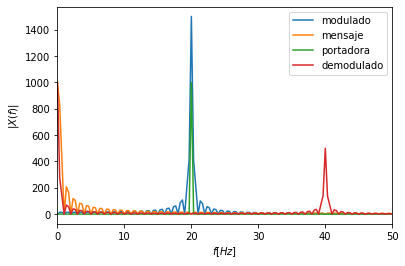

In [30]:
#señal demodulada
d = y*c

Xfd = np.fft.rfft(d)#espectro demodulada

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.plot(vfre,abs(Xfd),label='demodulado')
plt.xlim([0,2.5*Fc])
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.show()

Para encontrar $x(t)$ desde $d(t)$ se puede reconstruir (filtrar) los componentes bajos de $D(w)$ dado que el proceso de modulación y demodulación AM llevan el espectro de $m(t)$ hacia la frecuencia de la portadora $\omega_c$, la cual se fija mucho más grande que el ancho de banda de $m(t)$. A continuación se presenta el filtrado espectral con Fourier. En la práctica, generalmente se utilizan filtros análogos por facilidad de implementación y eficiencia de proceso. El nivel DC y la amplitud de la señal recuperada se pueden ajustar fácilmente mediante circuitos amplificadores y sumadores.

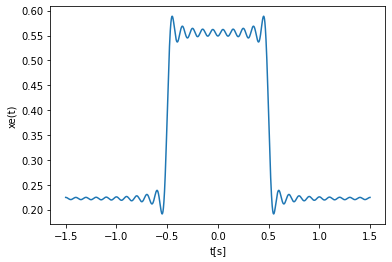

In [31]:
fi = 0
ff = 10
ind = (vfre >=fi) & (vfre <= ff)

Xfd[~ind]=0
xe = np.fft.irfft(Xfd)
plt.plot(t,xe)
plt.xlabel('t[s]')
plt.ylabel('xe(t)')
plt.show()